<h1 style="text-align: center;">Variables INCENTIVO_FISCAL</h1>

Cargamos el DataSet

In [26]:
import pandas as pd

dataset_work_4 = pd.read_csv('D:\DataSet\dataset_work_3.csv')
x = dataset_work_4.iloc[:,:-1]
y = dataset_work_4.iloc[:,-1].values
dataset_work_4.columns

Index(['PERIODO', 'MONTO_IMPONIBLE_LOG', 'IMPUESTO_TOTAL_LOG', 'PERCEPCIONES',
       'RETENCIONES', 'INCENTIVO_FISCAL', 'EMPLEADOS', 'PROVINCIA',
       'LOCALIDAD', 'CONDICION_AFIP', 'TAMANO', 'ACTIVIDAD', 'INFLACION',
       'MOROSIDAD'],
      dtype='object')

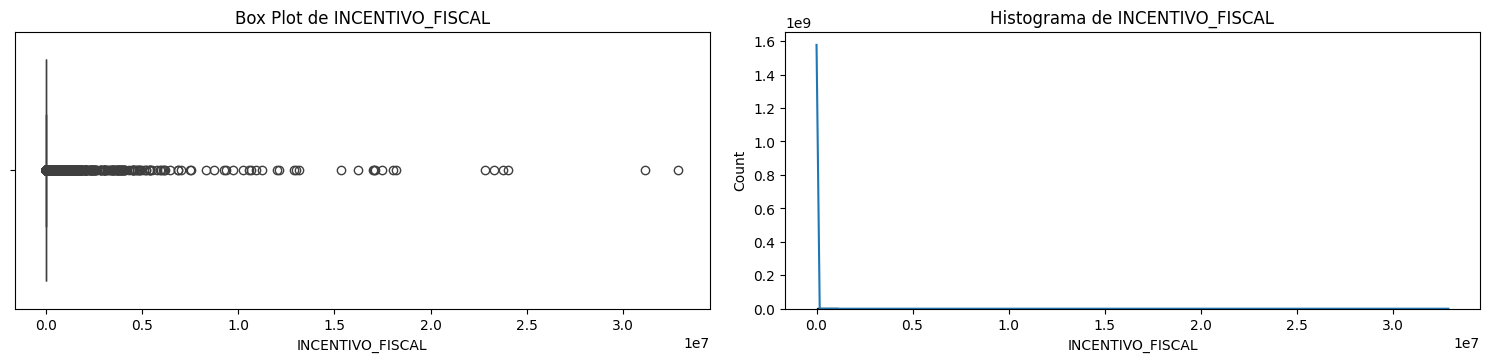

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que dataset_work_6 es tu DataFrame y que estás interesado en la columna EMPLEADOS

# Configurar el tamaño de la figura para contener todos los gráficos
plt.figure(figsize=(15, 10))

# Crear el diagrama de caja (box plot)
plt.subplot(3, 2, 1)  # 3 filas, 2 columnas, primer gráfico
sns.boxplot(x=dataset_work_4['INCENTIVO_FISCAL'])
plt.title('Box Plot de INCENTIVO_FISCAL')

# Crear el histograma
plt.subplot(3, 2, 2)  # 3 filas, 2 columnas, segundo gráfico
sns.histplot(dataset_work_4['INCENTIVO_FISCAL'], bins=30, kde=True)
plt.title('Histograma de INCENTIVO_FISCAL')


# Ajustar el espaciado para que los gráficos no se superpongan
plt.tight_layout()

# Mostrar todos los gráficos
plt.show()

In [28]:
def calcular_estadisticas_completas(df, columna):
    # Obtener estadísticas básicas con describe()
    estadisticas = dataset_work_4[columna].describe()
    
    # Calcular estadísticas adicionales
    estadisticas['asimetria'] = df[columna].skew()
    estadisticas['curtosis'] = df[columna].kurtosis()
    estadisticas['varianza'] = df[columna].var()
    
    return estadisticas

# Llamada a la función
estadisticas_completas = calcular_estadisticas_completas(dataset_work_4, 'INCENTIVO_FISCAL')
display(estadisticas_completas)

count        6.435903e+06
mean         3.762965e+02
std          4.062635e+04
min          0.000000e+00
25%          0.000000e+00
50%          0.000000e+00
75%          0.000000e+00
max          3.290467e+07
asimetria    4.325602e+02
curtosis     2.450618e+05
varianza     1.650500e+09
Name: INCENTIVO_FISCAL, dtype: float64

In [29]:
# Lista de variables numéricas a analizar
variables = ['INCENTIVO_FISCAL']
outliers_summary = {}

# Calcular outliers usando IQR para cada variable
for variable in variables:
    Q1 = dataset_work_4[variable].quantile(0.25)
    Q3 = dataset_work_4[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filtrar outliers
    outliers = dataset_work_4[(dataset_work_4[variable] < lower_bound) | (dataset_work_4[variable] > upper_bound)]
    
    # Guardar resultados en un diccionario
    outliers_summary[variable] = {
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Number of Outliers': len(outliers)
    }

# Convertir el resumen de outliers en un DataFrame para una mejor visualización
outliers_summary_dataset_work_4 = pd.DataFrame(outliers_summary).T

print(outliers_summary_dataset_work_4)

                  Lower Bound  Number of Outliers  Upper Bound
INCENTIVO_FISCAL          0.0            447670.0          0.0


In [30]:
# Contar los valores que son iguales a 0
cantidad_cero = (dataset_work_4['INCENTIVO_FISCAL'] == 0).sum()

# Contar los valores que están entre 0 y 10 (excluyendo 0)
cantidad_negativa = (dataset_work_4['INCENTIVO_FISCAL'] < 0).sum()

# Contar los valores que son mayores a 10
cantidad_mas_de_0 = (dataset_work_4['INCENTIVO_FISCAL'] > 0).sum()

# Mostrar los resultados
print(f"Cantidad de valores igual a 0 en INCENTIVO_FISCAL: {cantidad_cero}")
print(f"Cantidad de valores negativos INCENTIVO_FISCAL: {cantidad_negativa}")
print(f"Cantidad de valores mayores a 0 en INCENTIVO_FISCAL: {cantidad_mas_de_0}")

Cantidad de valores igual a 0 en INCENTIVO_FISCAL: 5988233
Cantidad de valores negativos INCENTIVO_FISCAL: 0
Cantidad de valores mayores a 0 en INCENTIVO_FISCAL: 447670


In [31]:
# Calcular el porcentaje de ceros
total_valores = dataset_work_4['INCENTIVO_FISCAL'].count()
total_ceros = (dataset_work_4['INCENTIVO_FISCAL'] == 0).sum()
porcentaje_ceros = (total_ceros / total_valores) * 100

porcentaje_ceros

93.04417732834071


### **Crear una Variable Binaria TIENE_INCENTIVO_FISCAL:**
   Ya que los ceros tienen una interpretación importante (contribuyentes sin incentivo), creamos una **variable binaria** que capture esta información.  Esto permite que al modelo saber de forma explícita si un contribuyente tiene o no un incentivo fiscal, mejorando la capacidad predictiva.

 

In [32]:
# Crear variable binaria
dataset_work_4['TIENE_INCENTIVO_FISCAL'] = dataset_work_4['INCENTIVO_FISCAL'].apply(lambda x: 1 if x > 0 else 0)


### **Crear una Variable INCENTIVO_FISCAL_MONTO_IMP:**

Para evitar que la nueva variable derivada de **INCENTIVO_FISCAL** tenga tantos valores acumulados en cero, se puede realizar **ingeniería de características** combinando esta variable con otras del dataset. 

La creación de la variable **INCENTIVO_FISCAL_MONTO_IMP** responde a la necesidad de explorar y cuantificar la relación entre el **MONTO_IMPONIBLE_LOG** (una transformación logarítmica del monto imponible) y el **INCENTIVO_FISCAL** . Este análisis es crucial para entender cómo el incentivo fiscal impacta proporcionalmente sobre el monto imponible.   La nueva variable captura el cociente entre el monto imponible ajustado y el incentivo fiscal, lo que permite evaluar la proporción del monto imponible que está afectado o modulada por los incentivos fiscales otorgados. Esta relación es útil para identificar patrones en el comportamiento de los contribuyentes con respecto a los incentivos fiscales.


In [33]:
# Crear la nueva variable cociente sumando 1 a INCENTIVO_FISCAL para evitar división por cero
dataset_work_4['INCENTIVO_FISCAL_MONTO_IMP'] = dataset_work_4['MONTO_IMPONIBLE_LOG'] / (dataset_work_4['INCENTIVO_FISCAL'] + 1)


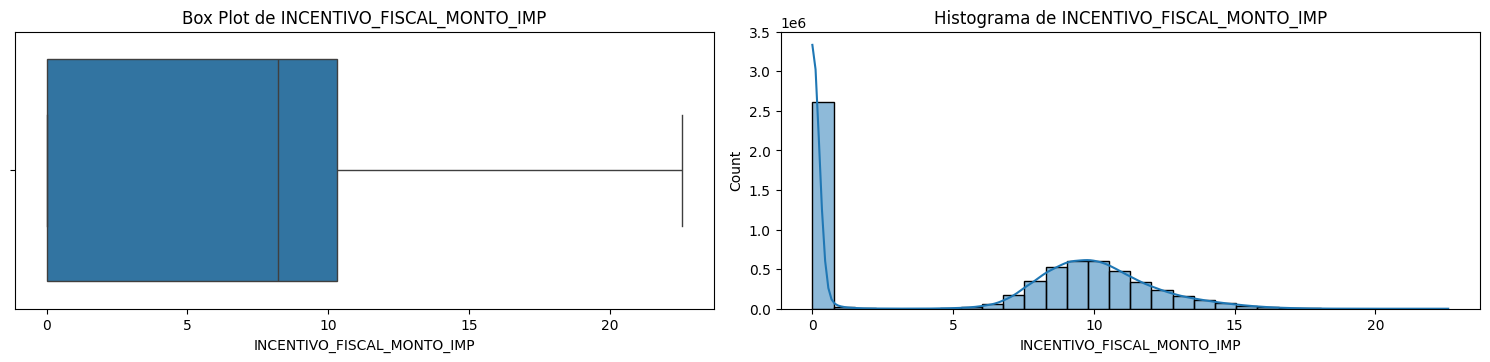

In [34]:
# Configurar el tamaño de la figura para contener todos los gráficos
plt.figure(figsize=(15, 10))

# Crear el diagrama de caja (box plot)
plt.subplot(3, 2, 1)  # 3 filas, 2 columnas, primer gráfico
sns.boxplot(x=dataset_work_4['INCENTIVO_FISCAL_MONTO_IMP'])
plt.title('Box Plot de INCENTIVO_FISCAL_MONTO_IMP')

# Crear el histograma
plt.subplot(3, 2, 2)  # 3 filas, 2 columnas, segundo gráfico
sns.histplot(dataset_work_4['INCENTIVO_FISCAL_MONTO_IMP'], bins=30, kde=True)
plt.title('Histograma de INCENTIVO_FISCAL_MONTO_IMP')


# Ajustar el espaciado para que los gráficos no se superpongan
plt.tight_layout()

# Mostrar todos los gráficos
plt.show()

In [43]:
# Lista de variables numéricas a analizar
variables = ['INCENTIVO_FISCAL', 'TIENE_INCENTIVO_FISCAL', 'INCENTIVO_FISCAL_MONTO_IMP']
outliers_summary = {}

# Calcular outliers usando IQR para cada variable
for variable in variables:
    Q1 = dataset_work_4[variable].quantile(0.25)
    Q3 = dataset_work_4[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filtrar outliers
    outliers = dataset_work_4[(dataset_work_4[variable] < lower_bound) | (dataset_work_4[variable] > upper_bound)]
    
    # Guardar resultados en un diccionario
    outliers_summary[variable] = {
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Number of Outliers': len(outliers)
    }

# Convertir el resumen de outliers en un DataFrame para una mejor visualización
outliers_summary_dataset_work_4 = pd.DataFrame(outliers_summary).T

print(outliers_summary_dataset_work_4)

                            Lower Bound  Upper Bound  Number of Outliers
INCENTIVO_FISCAL               0.000000     0.000000            447670.0
TIENE_INCENTIVO_FISCAL         0.000000     0.000000            447670.0
INCENTIVO_FISCAL_MONTO_IMP   -15.499053    25.831754                 0.0


In [37]:
dataset_work_5 = dataset_work_4.copy()

In [38]:
# Eliminamos las columnas indicadas del dataset
columnas_a_eliminar = ['INCENTIVO_FISCAL']

# Eliminar las columnas del dataframe
dataset_work_5 = dataset_work_5.drop(columns=columnas_a_eliminar) #, errors='ignore')  # errors='ignore' en caso de que no existan algunas columnas


In [39]:
dataset_work_5.columns

Index(['PERIODO', 'MONTO_IMPONIBLE_LOG', 'IMPUESTO_TOTAL_LOG', 'PERCEPCIONES',
       'RETENCIONES', 'EMPLEADOS', 'PROVINCIA', 'LOCALIDAD', 'CONDICION_AFIP',
       'TAMANO', 'ACTIVIDAD', 'INFLACION', 'MOROSIDAD',
       'TIENE_INCENTIVO_FISCAL', 'INCENTIVO_FISCAL_MONTO_IMP'],
      dtype='object')

In [40]:
# Asegúrate de que las columnas de tu DataFrame estén en el orden correcto y eliminando las que no necesites
columns_order = ['PERIODO', 'MONTO_IMPONIBLE_LOG', 'IMPUESTO_TOTAL_LOG','TIENE_INCENTIVO_FISCAL', 'INCENTIVO_FISCAL_MONTO_IMP', 'PERCEPCIONES',
       'RETENCIONES', 'EMPLEADOS', 'PROVINCIA', 'LOCALIDAD', 'CONDICION_AFIP',
       'TAMANO', 'ACTIVIDAD', 'INFLACION', 'MOROSIDAD']

# Reorganizar las columnas del DataFrame
dataset_work_5 = dataset_work_5[columns_order]


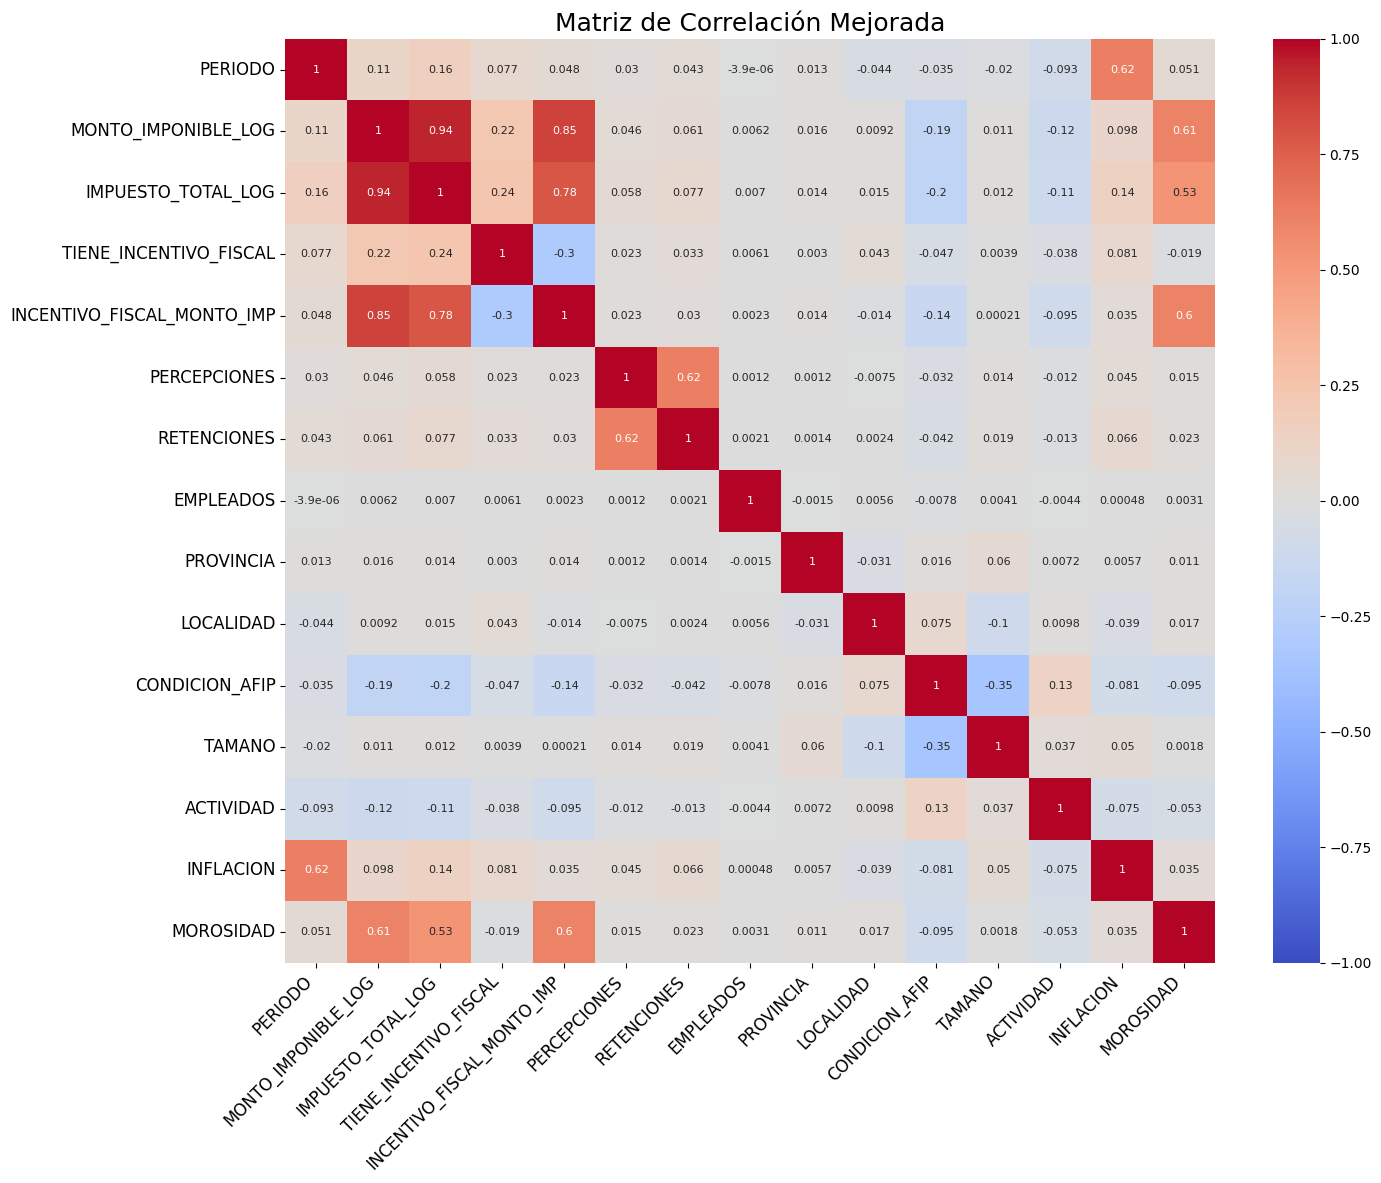

In [41]:
# Calculamos la matriz de correlación
correlation_matrix = dataset_work_5.corr()

# Ajustamos el tamaño de la figura y el tamaño de los números
plt.figure(figsize=(15, 12))  # Aumentamos el tamaño del gráfico
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, annot_kws={"size": 8})  # Ajustamos el tamaño de las anotaciones
plt.title('Matriz de Correlación Mejorada', fontsize=18)  # Título más grande
plt.xticks(rotation=45, ha="right", fontsize=12)  # Rotamos y ajustamos las etiquetas del eje X
plt.yticks(fontsize=12)  # Ajustamos las etiquetas del eje Y
plt.show()

### Resguardamos el DataSet

Resguardamos el dataset resultante en un nuevo archivo para poder seguir procesandolo.

In [42]:
import pandas as pd

# Especifica el nombre del archivo CSV donde se guardarán los datos
output_file = 'D:\DataSet\dataset_work_4.csv'

# Guarda el DataFrame en un archivo CSV
dataset_work_5.to_csv(output_file, index=False, encoding='utf-8')

# Mensaje de confirmación
print(f'DataFrame guardado en {output_file}')

DataFrame guardado en D:\DataSet\dataset_work_4.csv
